In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
salaries_all = pd.read_csv('Salaries.csv')

In [3]:
salaries_all = salaries_all[['yearID', 'playerID', 'salary']]

In [4]:
salaries_2008_all = salaries_all[salaries_all['yearID'] == 2008]

In [5]:
salaries_2008_all.head()

,yearID,playerID,salary
18955,2008,burkech01,955000
18956,2008,byrneer01,6666666
18957,2008,cruzju02,1937500
18958,2008,davisdo02,7750000
18959,2008,drewst01,1500000


In [6]:
salaries = salaries_2008_all.drop('yearID', axis=1)

In [7]:
batting_all = pd.read_csv('Batting.csv')

# Create a DataFrame of only the statistics I want to examine for batting.
# These are: Runs Batted In (RBI), Hits (H), Home Runs (HR)
batting_relevant_statistics = batting_all[['playerID', 'yearID', 'RBI', 'H', 'HR', 'G']]

In [9]:
# Modify the DataFrame to only include the years I want to examine. 
years_to_examine = [2006, 2007, 2008, 2009, 2010]
batting_relevant_statistics = batting_relevant_statistics[batting_relevant_statistics['yearID'].isin(years_to_examine)]

In [10]:
new_batting_relevant_statistics = batting_relevant_statistics.groupby(['playerID','yearID'], as_index=False).sum()


In [11]:
new_batting_relevant_statistics.head()

,playerID,yearID,RBI,H,HR,G
0,aardsda01,2006,0.0,0,0,45
1,aardsda01,2007,0.0,0,0,25
2,aardsda01,2008,0.0,0,0,47
3,aardsda01,2009,0.0,0,0,73
4,aardsda01,2010,0.0,0,0,53


In [12]:
years_played = list(new_batting_relevant_statistics.loc[new_batting_relevant_statistics['playerID']== 'aardsda01']['yearID'])

In [13]:
players_with_all_years = set()
for player_ID in new_batting_relevant_statistics['playerID']:
    years_played = []
    years_played = list(new_batting_relevant_statistics.loc[new_batting_relevant_statistics['playerID']== player_ID]['yearID'])
    if years_played == years_to_examine:
        players_with_all_years.add(player_ID)
        


In [14]:
new_batting_relevant_statistics = new_batting_relevant_statistics[new_batting_relevant_statistics['playerID'].isin(players_with_all_years)]

In [15]:
new_batting_relevant_statistics.head()

,playerID,yearID,RBI,H,HR,G
0,aardsda01,2006,0.0,0,0,45
1,aardsda01,2007,0.0,0,0,25
2,aardsda01,2008,0.0,0,0,47
3,aardsda01,2009,0.0,0,0,73
4,aardsda01,2010,0.0,0,0,53


In [16]:
salaries_2008_all.head()

,yearID,playerID,salary
18955,2008,burkech01,955000
18956,2008,byrneer01,6666666
18957,2008,cruzju02,1937500
18958,2008,davisdo02,7750000
18959,2008,drewst01,1500000


In [17]:
new_batting_relevant_statistics.merge(salaries_2008_all, on='playerID')

,playerID,yearID_x,RBI,H,HR,G,yearID_y,salary
0,aardsda01,2006,0.0,0,0,45,2008,403250
1,aardsda01,2007,0.0,0,0,25,2008,403250
2,aardsda01,2008,0.0,0,0,47,2008,403250
3,aardsda01,2009,0.0,0,0,73,2008,403250
4,aardsda01,2010,0.0,0,0,53,2008,403250
5,abreubo01,2006,107.0,163,15,156,2008,16000000
6,abreubo01,2007,101.0,171,16,158,2008,16000000
7,abreubo01,2008,100.0,180,20,156,2008,16000000
8,abreubo01,2009,103.0,165,15,152,2008,16000000
9,abreubo01,2010,78.0,146,20,154,2008,16000000


In [18]:
previous_years = [2006, 2007]
prev_years = batting_relevant_statistics[batting_relevant_statistics['yearID'].isin(previous_years)]
prev_years = prev_years.drop('yearID', axis=1)

In [19]:
prev_years = prev_years.groupby(['playerID']).mean()
prev_years = prev_years.reset_index()

In [20]:
salaries_2008_all  = salaries_2008_all.drop('yearID', axis=1)

In [21]:
prev_years_batting = salaries_2008_all.merge(prev_years)

In [22]:
prev_years_batting = prev_years_batting[prev_years_batting['G'] > 100]
prev_years_batting = prev_years_batting[prev_years_batting['RBI'] != 0]
prev_years_batting = prev_years_batting[prev_years_batting['H'] != 0]

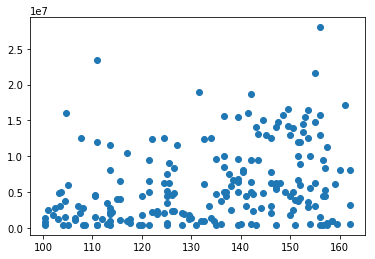

In [23]:
plt.scatter(prev_years_batting['G'], prev_years_batting['salary'])

In [24]:
prev_years_batting.corr()

,salary,RBI,H,HR,G
salary,1.000000,0.559406,0.392464,0.501946,0.307393
RBI,0.559406,1.000000,0.672292,0.880338,0.663407
H,0.392464,0.672292,1.000000,0.433529,0.834377
HR,0.501946,0.880338,0.433529,1.000000,0.491839
G,0.307393,0.663407,0.834377,0.491839,1.000000
